# data collection, cleaning, processing and training model for the app [cultural classifier](https://cultural-classifier.herokuapp.com/) and the scientific [paper](https://www.sciencedirect.com/science/article/abs/pii/S1040618220303657) 

In [ ]:
%matplotlib inline 
import re
import pandas as pd
import numpy as np
import scipy as sp
import random 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("poster")
#from mpl_toolkits.mplot3d import Axes3D

<div style="background-color: red; height:50px; width: 100%; display: inline-block; text-align:center;">
<h1>Data collection and basic exploratory analysis </h1>
</div>

In [7]:
dataset = pd.read_excel("C:/Users/hamro/Desktop/finished_projects/arch-heroku/data_used_for_training_model/arch_sites.xlsx")
df = dataset.copy()

### available data

In [8]:
df.head()

,No,site,X,Y,LU zone,LU Min,LU Max,LU Range,Terrain variability 500 m buffer,Terrain variability 1000 m buffer,...,Related River,Unnamed: 28,DtR (m)cor,DtR (d2),EAR2+DtR2,DrRslope (m) cumulative distance,orientation,Orientation (azimut),Viewhed,source
0,1,Alojzov I - Golštýn,-562964.93,-1138227.15,MHana_N,178,744,566,65,136,...,Morava,NaN,17400,302760000,302783716,17400.681481,NE,45,197464,Oliva 1987
1,2,Blažovice I,-585774.40,-1167261.00,Litava_N,169,587,418,23,43,...,Litava,NaN,3200,10240000,10256384,3202.558977,top,top,148319,Oliva 1987-PV
2,3,Bratčice,-604795.00,-1175455.00,Svratka_S,165,468,303,28,42,...,Svratka,NaN,5430,29484900,29488149,5430.299163,N,0,22734,Valoch 1974; Nerudová in press
3,4,Brno - Jundrov,-602166.00,-1157987.00,Svratka_N,190,487,297,48,127,...,Svratka,NaN,270,72900,75109,274.060212,SE,135,1834,Oliva 1991
4,5,Brno - Kohoutovice I,-603480.00,-1161080.00,Svratka_N,190,487,297,55,127,...,Svratka,NaN,2300,5290000,5330000,2308.679276,top,top,204292,Oliva 1987


In [9]:
df['orientation'].unique()

array(['NE', 'top', 'N', 'SE', 'E', 'floodplain', 'SW', 'W', 'S', 'NW'],
      dtype=object)

In [10]:
df.shape

(48, 37)

In [11]:
df.dtypes

No                                                                                                                                                                                                                                                      int64
site                                                                                                                                                                                                                                                   object
X                                                                                                                                                                                                                                                     float64
Y                                                                                                                                                                                                                                             

In [8]:
dataset.info

<bound method DataFrame.info of     No                                               site          X  \
0    1                                Alojzov I - Golštýn -562964.93   
1    2                                        Blažovice I -585774.40   
2    3                                           Bratčice -604795.00   
3    4                                     Brno - Jundrov -602166.00   
4    5                               Brno - Kohoutovice I -603480.00   
5    6                           Brno - Stránská skála IV -593250.00   
6    7                                 Brno - Štýřice III -599244.00   
7    8                            Brno -Štýřice, Hospital -599090.00   
8    9                        Brno - Štýřice, Kamenná St. -599258.00   
9   10                          Brno - Štýřice, Polní St. -599174.00   
10  11                Brno - Štýřice, Vídeňská St 849/15  -599202.00   
11  12                                 Dolní Otaslavice I -563232.97   
12  13           Drahanovice - n

In [6]:
da.duplicated().sum()

NameError: name 'df' is not defined

In [5]:
%%HTML
<div style="background-color: yellow; height:50px; width: 100%; display: inline-block; text-align:center;">
<h1>data wrangling (clean,transform,merge,reshape) </h1>
</div>

#### we have to delete NaN values
#### we have to change data types (object - denoted as O in python mosty just string)

##### classification if eau/epig denote as neutral
##### nekdo urcoval strategie na zaklade lithic/cores
##### Viewshed - kolik pixelu na mape lze z daneho mista videt ... slo by porovnat zda s vetsim viewshed klesa altitude lokality
##### Relative hight in LUmin (%) dost ovlivneny elevation above river
##### cili nejdulezitejsi parametry - elevation above river, terrain variability and how far from a river (DtR (m)cor )
##### pro nektere lokality typicke umisteni na vrcholku hory kvuli vyhledu - v nasem pripade  (brno-kohoutovice)

In [5]:
new_table_one = df.drop(['No','X','Y','Unnamed: 28','Unnamed: 26','DrRslope (m) cumulative distance', 'Blanks (n)','Počet použitých surovin','source','finds','stratigraphy','Related River','AUG content','Elevation above river (h2)','Altitude average','Velikost a typ lokality','Orientation (azimut)'],axis = 1)
# we dropped a column with index 11
new_table_one = new_table_one.drop(new_table_one.columns[11], axis=1)
new_table_one.head()

NameError: name 'df' is not defined

In [11]:
new_table_one.isnull().sum()

site                                 0
LU zone                              0
LU Min                               0
LU Max                               0
LU Range                             0
Terrain variability 500 m buffer     0
Terrain variability 1000 m buffer    0
Classsific.                          0
Lithics (N)                          5
Cores (N)                            8
Tools (N)                            8
Altitude a.s.l.                      1
Elevation above river (m)            0
Relative hight in LUmin (%)          0
DtR (m)cor                           0
DtR (d2)                             0
EAR2+DtR2                            0
orientation                          0
Viewhed                              0
dtype: int64

In [16]:
new_table_one.rename(columns = {"Viewhed":"Viewshed"}, inplace = True)
new_table_one.rename(columns = {"Classsific.":"Classific"}, inplace = True)
new_table_one

,site,LU zone,LU Min,LU Max,LU Range,Terrain variability 500 m buffer,Terrain variability 1000 m buffer,Classific,Lithics (N),Cores (N),Tools (N),Altitude a.s.l.,Elevation above river (m),Relative hight in LUmin (%),DtR (m)cor,DtR (d2),EAR2+DtR2,orientation,Viewshed
0,Alojzov I - Golštýn,MHana_N,178,744,566,65,136,EAU,8015,305.0,1879,323-341,154,27.208481,17400,302760000,302783716,NE,197464
1,Blažovice I,Litava_N,169,587,418,23,43,EAU/EPIG,75,6.0,15,297,128,30.622010,3200,10240000,10256384,top,148319
2,Bratčice,Svratka_S,165,468,303,28,42,EPIG,8,0.0,0,NaN,57,18.811881,5430,29484900,29488149,N,22734
3,Brno - Jundrov,Svratka_N,190,487,297,48,127,EAU/EPIG,335,14.0,60,235-240,47,15.824916,270,72900,75109,SE,1834
4,Brno - Kohoutovice I,Svratka_N,190,487,297,55,127,EAU,915,43.0,200,390,200,67.340067,2300,5290000,5330000,top,204292
5,Brno - Stránská skála IV,Svitava E,183,472,289,48,70,EAU/EPIG,144,11.0,21,254,71,24.567474,3430,11764900,11769941,N,114620
6,Brno - Štýřice III,Svratka_N,190,487,297,31,68,EPIG,9149,124.0,248,220,30,10.101010,250,62500,63400,NE,7675
7,"Brno -Štýřice, Hospital",Svratka_N,190,487,297,21,72,EPIG,25,1.0,4,209,15,5.050505,80,6400,6625,E,2460
8,"Brno - Štýřice, Kamenná St.",Svratka_N,190,487,297,28,72,EPIG,140,4.0,16,210,20,6.734007,140,19600,20000,floodplain,5558
9,"Brno - Štýřice, Polní St.",Svratka_N,190,487,297,26,68,EPIG,1,0.0,0,210,20,6.734007,160,25600,26000,E,6692


In [17]:
new_table_one['Classific'].value_counts()


EPIG        26
EAU         15
EAU/EPIG     4
?            2
SZ/EAU       1
Name: Classific, dtype: int64

### question mark is a special character, we have to escape it \ ... we're replacing our not complete clearly determined cultural affiliation with temporary ambiguous values

In [18]:
replaced_column = new_table_one['Classific']
replaced_column = replaced_column.replace({'EAU/EPIG': 'AMB','\?':'AMB','SZ/EAU':'AMB'}, regex=True)

# we're replacing all values in the Classific column
for i in range(len(new_table_one['Classific'])):
    new_table_one['Classific'].iloc[i] = replaced_column[i]
new_table_one['Classific'].head()

C:\Users\Hamrozi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0     EAU
1     AMB
2    EPIG
3     AMB
4     EAU
Name: Classific, dtype: object

### check datatypes
#### we' re adding additional value at the index 2

In [19]:
from copy import deepcopy

print(new_table_one['Altitude a.s.l.'].dtypes)
new_table_one['Altitude a.s.l.'].head()
new_table_one['Altitude a.s.l.'].iloc[2] = 220
new_table_one['Altitude a.s.l.']

changed_table = deepcopy(new_table_one)
changed_table['Altitude a.s.l.']

object


0     323-341
1         297
2         220
3     235-240
4         390
5         254
6         220
7         209
8         210
9         210
10        210
11    298-306
12        310
13        267
14    282-290
15        205
16        316
17    230-235
18        330
19        295
20        297
21    320-360
22    307-321
23        263
24        270
25        260
26        220
27        500
28    180-190
29        321
30        370
31        330
32    225-265
33        330
34    300-340
35        401
36        316
37        464
38    280-310
39        460
40        390
41    250-270
42    320-338
43    290-298
44        257
45        185
46    370-385
47        225
Name: Altitude a.s.l., dtype: object

#### we have to get rid of these interval values and replace Nan value e.g. as average values of sites situated around the closest river

### replacing nan value in Altitude a.s.l. column with average of Altitude of areas situated nearby svratka river ... imputation

#### the method fillna can't be used in this case because of the invarval values

#### aside: it would be also possible replace interval values and then use fillna method for nan value

### we have to get rid of all values with desh sign and make an average of two numbers (and round it down) ... we're rounding up because we're trying to avoid underestimating the variance 
#### i used regex as well

#### zmena typu v numpy astype or asarray

In [21]:
import math


changed_table['Altitude a.s.l.'] = changed_table['Altitude a.s.l.'].astype(str)
#for item in changed_table['Altitude a.s.l.']: 
pattern = '-' 
regex = re.compile(pattern)
new_column = changed_table['Altitude a.s.l.'].apply(lambda x: regex.split(x))

new_column_correct = []
for i in new_column:
    sum_x = 0
    if len(i) == 2:
        for j in i:
            j = int(j)
            sum_x += j
        new_column_correct.append(math.ceil(sum_x/2))
    else:
        i = int(*i)
        new_column_correct.append(i)

new_column_correct[:5]


[332, 297, 220, 238, 390]

### now we have to replaced all interval values ... we can use method replace ...
#### e.g. data.revenue(columns = lambda x: x.replace('','_'), inplace = True) ... inplace = True actually alter data
#### znuvu slo by uzit i apply, ale lepsi by byla comprehenze

In [22]:
for i in range(len(new_table_one['Altitude a.s.l.'])):
    new_table_one['Altitude a.s.l.'].iloc[i] = new_column_correct[i]
new_table_one['Altitude a.s.l.'].head()


0    332
1    297
2    220
3    238
4    390
Name: Altitude a.s.l., dtype: object

#### create new column for relative hight in Lumin


In [24]:
new_table_one_1 = new_table_one
new_table_one_1['Normalized height in Lu Min'] = new_table_one_1['Relative hight in LUmin (%)']/100
new_table_one_1.head(3)

,site,LU zone,LU Min,LU Max,LU Range,Terrain variability 500 m buffer,Terrain variability 1000 m buffer,Classific,Lithics (N),Cores (N),Tools (N),Altitude a.s.l.,Elevation above river (m),Relative hight in LUmin (%),DtR (m)cor,DtR (d2),EAR2+DtR2,orientation,Viewshed,Normalized height in Lu Min
0,Alojzov I - Golštýn,MHana_N,178,744,566,65,136,EAU,8015,305.0,1879,332,154,27.208481,17400,302760000,302783716,NE,197464,0.272085
1,Blažovice I,Litava_N,169,587,418,23,43,AMB,75,6.0,15,297,128,30.622010,3200,10240000,10256384,top,148319,0.306220
2,Bratčice,Svratka_S,165,468,303,28,42,EPIG,8,0.0,0,220,57,18.811881,5430,29484900,29488149,N,22734,0.188119


In [154]:
%%HTML
<div style="background-color: blue; height:50px; width: 100%; display: inline-block; text-align:center;">
<h1>data exploration</h1>
</div>

In [26]:
eau = new_table_one_1[new_table_one_1['Classific'] == 'EAU']
epig = new_table_one_1[new_table_one_1['Classific'] == 'EPIG']

In [28]:
mean_eau = eau['Elevation above river (m)'].mean()
print(mean_eau)

139.0


In [29]:
std_epig = epig['Elevation above river (m)'].std()
print(std_epig)

58.380871472136775


In [31]:
mean_epig =epig['Elevation above river (m)'].mean()
print(mean_epig)

67.61538461538461


In [32]:
std_eau = eau['Elevation above river (m)'].std()
print(std_eau)

45.1473777121741


### normal distribution related to elevation above river 

<IPython.core.display.Javascript object>


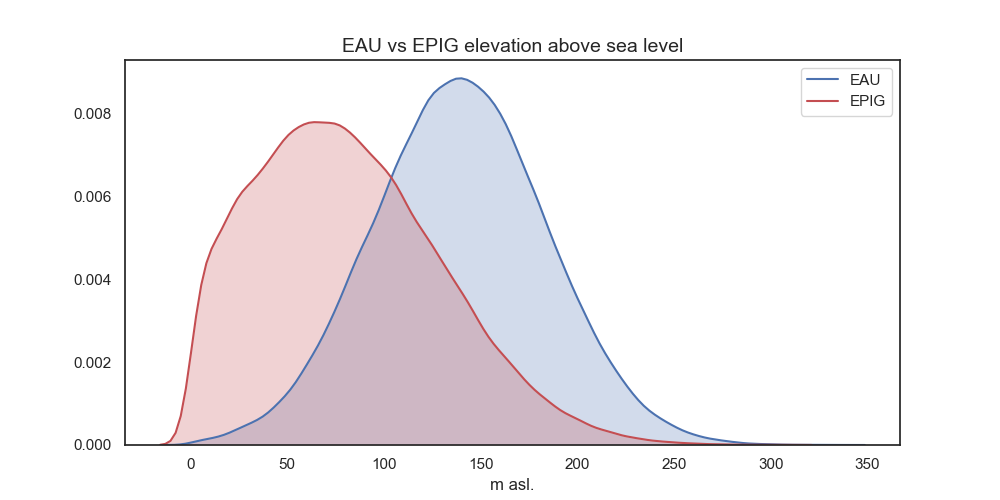

In [88]:
sns.set_style("white")
number_of_trials = 100000
epig_distribution = np.random.normal(mean_epig, std_epig, size= number_of_trials)
eau_distribution = np.random.normal(mean_eau, std_eau, size= number_of_trials)

plt.figure(figsize = (10,5))
plt.title("EAU vs EPIG elevation above sea level", fontsize = 14)
sns.kdeplot(eau_distribution, shade=True, color="b", clip = (0, 400), label='EAU')
sns.kdeplot(epig_distribution, shade=True, color="r", clip = (0, 400), label="EPIG")
plt.legend(loc='upper right')
plt.xlabel("m asl.")
plt.show()


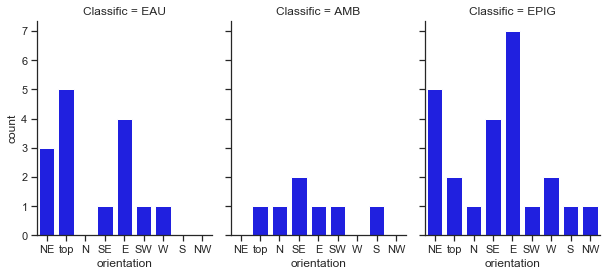

In [121]:
# i have to get rid of floodplain orientation because is misleading and insignificant
%matplotlib inline 
df_orientation = new_table_one.loc[new_table_one['orientation'].apply(lambda x: x!= 'floodplain')]
sns.set(style="ticks")
g = sns.catplot(x="orientation", col="Classific",
                data=df_orientation, kind="count",
                height=4, aspect=.7, color = "blue");



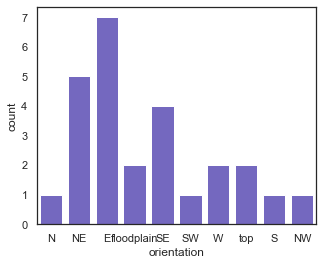

In [125]:
%matplotlib inline 
import seaborn as sns


sns.set(style="white")
sns.set_context({"figure.figsize": (5, 4)})

ax = sns.countplot(x="orientation", data=epig, color = "slateblue")

plt.show()
#plt.savefig("C:/neruda_viz/cardinal_direction_blue_total.pdf")

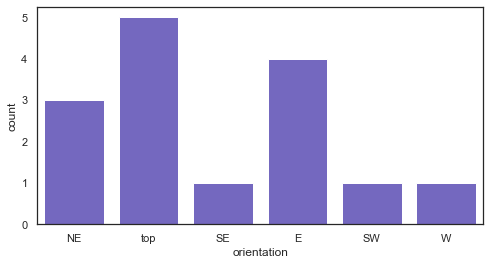

In [129]:
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set_context({"figure.figsize": (8, 4)})

ax = sns.countplot(x="orientation", data=eau, color = "slateblue")


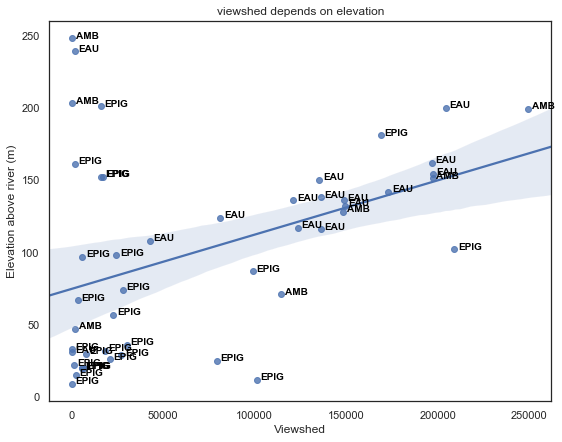

In [141]:

sns.set(style="white")


fig= plt.figure(figsize=(9,7)) 
# confidence interval 95 percent
p1 = sns.regplot(x='Viewshed', y='Elevation above river (m)',  ci=95, truncate=False, fit_reg = True,
            data=new_table_one)
plt.title("viewshed depends on elevation")
# add annotations one by one with a loop
for line in range(0,new_table_one.shape[0]):
     p1.text(new_table_one['Viewshed'].iloc[line] + 2000, new_table_one['Elevation above river (m)'].iloc[line], new_table_one['Classific'].iloc[line],horizontalalignment='left', size='small', color='black', weight='semibold')


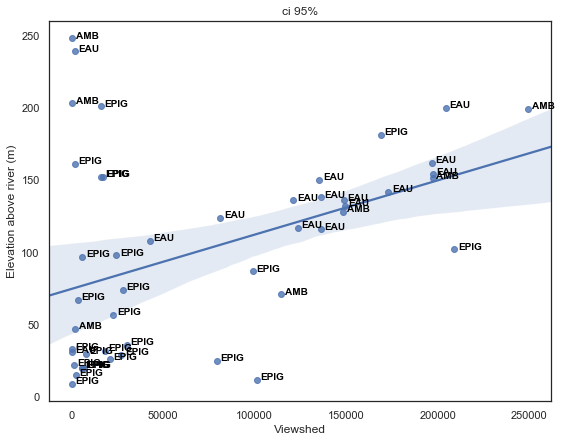

In [149]:
##### import seaborn as sns
sns.set(style="white")
#sns.set_context("poster")

fig= plt.figure(figsize=(9,7)) 
# confidence interval 95 percent
p1 = sns.regplot(x='Viewshed', y='Elevation above river (m)',  ci=95, truncate=False, fit_reg = True,
            data=new_table_one)
plt.title("ci 95%")
# add annotations one by one with a loop
for line in range(0,new_table_one.shape[0]):
     p1.text(new_table_one['Viewshed'].iloc[line] + 2000, new_table_one['Elevation above river (m)'].iloc[line], new_table_one['Classific'].iloc[line],horizontalalignment='left', size='small', color='black', weight='semibold')
        
#fig.savefig("C:/neruda_viz/reg_ci_another95.pdf")

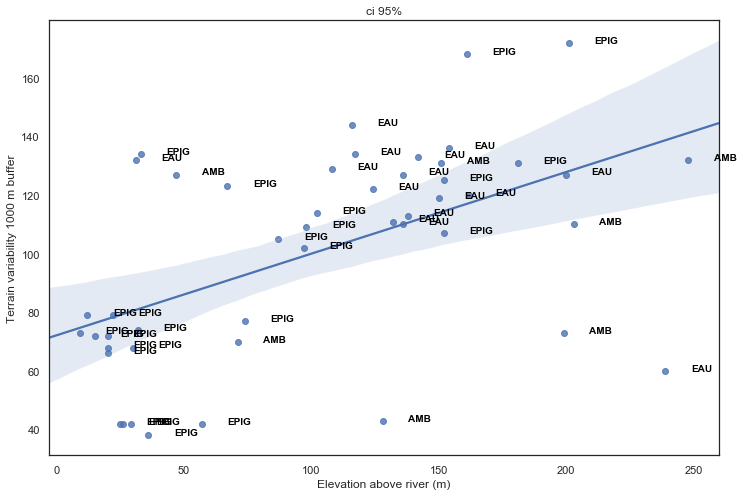

In [164]:
sns.set(style="white")

fig= plt.figure(figsize=(12,8)) 
# confidence interval 95 percent
p1 = sns.regplot(x='Elevation above river (m)', y='Terrain variability 1000 m buffer',  ci=95, truncate=False,
            data=new_table_one)
plt.title("ci 95%")
# add annotations one by one with a loop
for line in range(0,new_table_one.shape[0]):
     p1.text(new_table_one['Elevation above river (m)'].iloc[line] + 10, new_table_one['Terrain variability 1000 m buffer'].iloc[line], new_table_one['Classific'].iloc[line],horizontalalignment='left', size='small', color='black', weight='semibold')

[]

<Figure size 864x576 with 0 Axes>

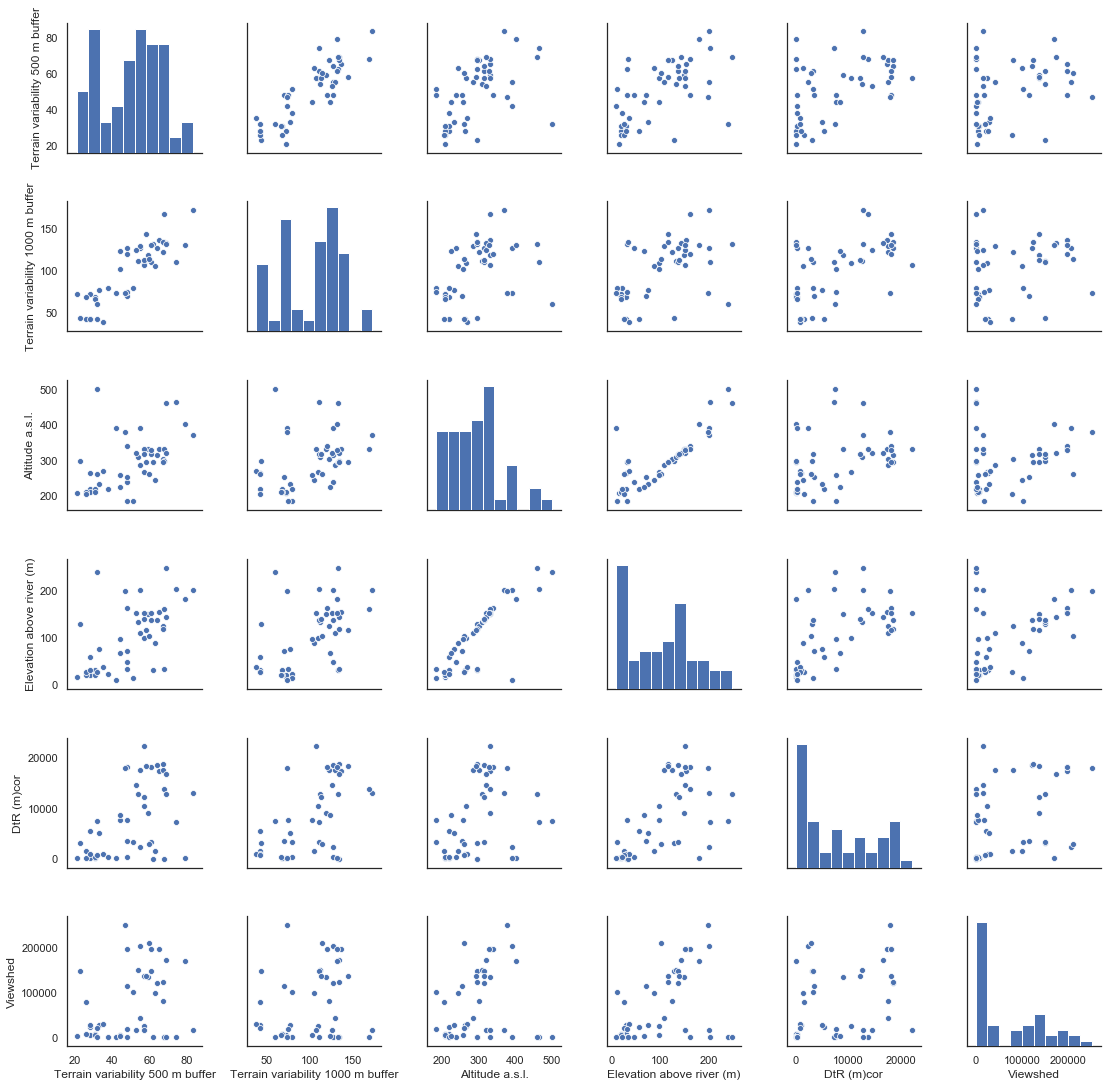

In [174]:
fig = plt.figure(figsize= (12,8))
sns.pairplot(new_table_one[['Terrain variability 500 m buffer', 'Terrain variability 1000 m buffer','Altitude a.s.l.',
       'Elevation above river (m)',
       'DtR (m)cor','Viewshed']])
fig.savefig("C:/neruda_viz/pairplot.pdf")
plt.plot()

In [175]:
new_table_one

,site,LU zone,LU Min,LU Max,LU Range,Terrain variability 500 m buffer,Terrain variability 1000 m buffer,Classific,Lithics (N),Cores (N),Tools (N),Altitude a.s.l.,Elevation above river (m),Relative hight in LUmin (%),DtR (m)cor,DtR (d2),EAR2+DtR2,orientation,Viewshed,Normalized height in Lu Min
0,Alojzov I - Golštýn,MHana_N,178,744,566,65,136,EAU,8015,305.0,1879,332,154,27.208481,17400,302760000,302783716,NE,197464,0.272085
1,Blažovice I,Litava_N,169,587,418,23,43,AMB,75,6.0,15,297,128,30.622010,3200,10240000,10256384,top,148319,0.306220
2,Bratčice,Svratka_S,165,468,303,28,42,EPIG,8,0.0,0,220,57,18.811881,5430,29484900,29488149,N,22734,0.188119
3,Brno - Jundrov,Svratka_N,190,487,297,48,127,AMB,335,14.0,60,238,47,15.824916,270,72900,75109,SE,1834,0.158249
4,Brno - Kohoutovice I,Svratka_N,190,487,297,55,127,EAU,915,43.0,200,390,200,67.340067,2300,5290000,5330000,top,204292,0.673401
5,Brno - Stránská skála IV,Svitava E,183,472,289,48,70,AMB,144,11.0,21,254,71,24.567474,3430,11764900,11769941,N,114620,0.245675
6,Brno - Štýřice III,Svratka_N,190,487,297,31,68,EPIG,9149,124.0,248,220,30,10.101010,250,62500,63400,NE,7675,0.101010
7,"Brno -Štýřice, Hospital",Svratka_N,190,487,297,21,72,EPIG,25,1.0,4,209,15,5.050505,80,6400,6625,E,2460,0.050505
8,"Brno - Štýřice, Kamenná St.",Svratka_N,190,487,297,28,72,EPIG,140,4.0,16,210,20,6.734007,140,19600,20000,floodplain,5558,0.067340
9,"Brno - Štýřice, Polní St.",Svratka_N,190,487,297,26,68,EPIG,1,0.0,0,210,20,6.734007,160,25600,26000,E,6692,0.067340


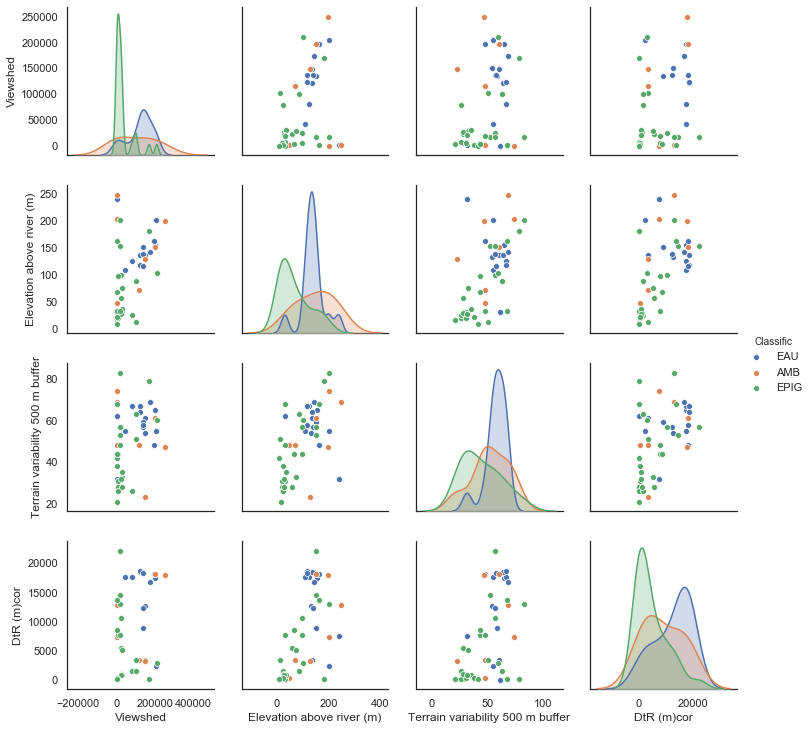

In [181]:
from pylab import savefig
pairplot_table = new_table_one[['Viewshed','Classific','Elevation above river (m)','Terrain variability 500 m buffer','DtR (m)cor']]
sns.set(style="white")


svm = sns.pairplot(pairplot_table, hue="Classific");
  


In [186]:
'''
only exploration by using group function
'''
tmp1 = new_table_one[["Classific","LU Range","Altitude a.s.l.", 'Terrain variability 500 m buffer',"Elevation above river (m)","Relative hight in LUmin (%)","DtR (m)cor",\
                     "Viewshed","orientation"]].groupby(['Classific'],\
                    as_index = False).mean().sort_values(by='Elevation above river (m)', ascending=False)

tmp1

,Classific,LU Range,Terrain variability 500 m buffer,Elevation above river (m),Relative hight in LUmin (%),DtR (m)cor,Viewshed
0,AMB,523.000000,52.857143,149.571429,28.346819,8992.857143,101759.428571
1,EAU,498.933333,58.200000,139.000000,29.021149,12656.000000,123184.000000
2,EPIG,434.500000,45.153846,67.615385,16.948831,4682.692308,35363.807692


In [190]:
'''
group based on regions
'''
tmp2 = new_table_one[["LU zone","Classific","LU Range","Altitude a.s.l.", 'Terrain variability 500 m buffer',"Elevation above river (m)","Relative hight in LUmin (%)","DtR (m)cor",\
                     "Viewshed","orientation"]].groupby(['LU zone','Classific'],\
                    as_index = False).mean().sort_values(by='Elevation above river (m)', ascending=False)
# round to one decimal place
tmp2.round(1)


,LU zone,Classific,LU Range,Terrain variability 500 m buffer,Elevation above river (m),Relative hight in LUmin (%),DtR (m)cor,Viewshed
15,Odra_S,AMB,1038.0,69.0,248.0,23.9,12800.0,427.0
13,MKras,EAU,487.0,32.0,239.0,49.1,7450.0,1682.0
12,MKras,AMB,487.0,74.0,203.0,41.7,7250.0,260.0
21,Svratka_N,EAU,297.0,55.0,200.0,67.3,2300.0,204292.0
18,Oslava_SW,EPIG,270.0,79.0,181.0,67.0,130.0,169096.0
8,MHana_N,AMB,566.0,54.0,175.0,30.9,18000.0,223428.0
7,Litava_N,EPIG,418.0,65.2,153.0,36.6,12937.5,14720.0
10,MHana_N,EPIG,566.0,57.0,152.0,26.9,22150.0,16236.0
11,MHana_S,EAU,405.0,60.0,143.0,35.3,6125.0,142118.5
9,MHana_N,EAU,566.0,60.4,132.9,23.5,16780.0,135733.1


In [68]:
%%HTML
<div style="background-color: orange; height:50px; width: 100%; display: inline-block; text-align:center;">
<h1>normalized dataset</h1>
<h2>e.g. Viewshed is not in metres and relative high in Lumin is in percentage </h2>
<h2> important values method turn pandas dataframe to numpy ndarray </h2>
</div>

In [91]:
table_preprocessed = new_table_one_1.copy()

In [130]:
from sklearn import preprocessing
import pandas as pd

x = table_preprocessed[[
       'Terrain variability 500 m buffer', 'Terrain variability 1000 m buffer','Elevation above river (m)', 
       'DtR (m)cor', 'Viewshed']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df
data_normalized = pd.concat([df,table_preprocessed['Normalized height in Lu Min'] ,table_preprocessed['Classific']], axis = 1)
data_normalized.columns = ['Terrain variability 500 m buffer', 'Terrain variability 1000 m buffer','Elevation above river (m)', 
       'DtR Rounded', 'Viewshed', 'Normalized height in Lu Min','Classific']
data_normalized.head(3)

,Terrain variability 500 m buffer,Terrain variability 1000 m buffer,Elevation above river (m),DtR Rounded,Viewshed,Normalized height in Lu Min,Classific
0,0.709677,0.731343,0.606695,0.785165,0.790869,0.272085,EAU
1,0.032258,0.037313,0.497908,0.142922,0.593822,0.306220,AMB
2,0.112903,0.029851,0.200837,0.243781,0.090290,0.188119,EPIG


In [131]:
data_normalized = data_normalized[((data_normalized['Classific'] == 'EAU') | (data_normalized['Classific'] == 'EPIG'))]
data_normalized

,Terrain variability 500 m buffer,Terrain variability 1000 m buffer,Elevation above river (m),DtR Rounded,Viewshed,Normalized height in Lu Min,Classific
0,0.709677,0.731343,0.606695,0.785165,0.790869,0.272085,EAU
2,0.112903,0.029851,0.200837,0.243781,0.090290,0.188119,EPIG
4,0.548387,0.664179,0.799163,0.102216,0.818246,0.673401,EAU
6,0.161290,0.223881,0.087866,0.009498,0.029911,0.101010,EPIG
7,0.000000,0.253731,0.025105,0.001809,0.009001,0.050505,EPIG
8,0.112903,0.253731,0.046025,0.004523,0.021423,0.067340,EPIG
9,0.080645,0.223881,0.046025,0.005427,0.025969,0.067340,EPIG
10,0.161290,0.208955,0.046025,0.010403,0.022714,0.067340,EPIG
11,0.741935,0.626866,0.481172,0.794211,0.324865,0.219081,EAU
12,0.532258,0.544776,0.514644,0.572592,0.597844,0.233216,EAU


In [133]:
final_cultures_1 = []
for i in range(len(data_normalized['Classific'])):
    if data_normalized['Classific'].iloc[i] == 'EAU':
        final_cultures_1.append(0)
    elif data_normalized['Classific'].iloc[i] == 'EPIG':
        final_cultures_1.append(1)
    else:
        pass
    
print(final_cultures_1, end = " ") 


for i in range(len(final_cultures_1)):
    data_normalized['Classific'].iloc[i] = final_cultures_1[i]
data_normalized.head()

[] 

,Terrain variability 500 m buffer,Terrain variability 1000 m buffer,Elevation above river (m),DtR Rounded,Viewshed,Normalized height in Lu Min,Classific
0,0.709677,0.731343,0.606695,0.785165,0.790869,0.272085,0
2,0.112903,0.029851,0.200837,0.243781,0.090290,0.188119,1
4,0.548387,0.664179,0.799163,0.102216,0.818246,0.673401,0
6,0.161290,0.223881,0.087866,0.009498,0.029911,0.101010,1
7,0.000000,0.253731,0.025105,0.001809,0.009001,0.050505,1


# because we are comparing categorical variables (our target) to continuous variables ... we have to use anova test for feature selection not chi square test which compares categorical dependent and independent variables 

In [134]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Y = data_normalized.iloc[:,-1] # target column
X = data_normalized.iloc[:,0:6] # independent columns
X.head()



,Terrain variability 500 m buffer,Terrain variability 1000 m buffer,Elevation above river (m),DtR Rounded,Viewshed,Normalized height in Lu Min
0,0.709677,0.731343,0.606695,0.785165,0.790869,0.272085
2,0.112903,0.029851,0.200837,0.243781,0.090290,0.188119
4,0.548387,0.664179,0.799163,0.102216,0.818246,0.673401
6,0.161290,0.223881,0.087866,0.009498,0.029911,0.101010
7,0.000000,0.253731,0.025105,0.001809,0.009001,0.050505


In [135]:
#initialize the model
best_features = SelectKBest(score_func=f_classif, k = 6)
fit = best_features.fit(X,Y)

results = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

results_table = pd.concat([dfcolumns, results],axis=1)
results_table.columns = ['Features', 'Score']
results_table.sort_values(by='Score', ascending = False)

results_table.nlargest(7,'Score')

,Features,Score
4,Viewshed,21.759087
2,Elevation above river (m),16.619790
3,DtR Rounded,15.867433
1,Terrain variability 1000 m buffer,9.181336
0,Terrain variability 500 m buffer,7.144419
5,Normalized height in Lu Min,5.957123


In [136]:
data_normalized.keys()

Index(['Terrain variability 500 m buffer', 'Terrain variability 1000 m buffer',
       'Elevation above river (m)', 'DtR Rounded', 'Viewshed',
       'Normalized height in Lu Min', 'Classific'],
      dtype='object')

In [144]:
%%HTML
<div style="background-color: blue; height:50px; width: 100%; display: inline-block; text-align:center;">
<h1>data exploration</h1>
</div>

## podivat se zda clenitost blizkeho terenu je statisticky vyznamna jako kulturni rozdeleni -- eau - spise vice clenity teren

### cili budu muset vytvorit podtabulku

### barplots for cultures

In [ ]:
new_table_one.head()

In [182]:
new_table_one['Classific'].value_counts()

EPIG    26
EAU     15
AMB      7
Name: Classific, dtype: int64

In [185]:
'''
only exploration by using group function
'''
tmp1 = new_table_one[["Classific","LU Range","Altitude a.s.l.", 'Terrain variability 500 m buffer',"Elevation above river (m)","Relative hight in LUmin (%)","DtR (m)cor",\
                     "Viewshed","orientation"]].groupby(['Classific'],\
                    as_index = False).mean().sort_values(by='Elevation above river (m)', ascending=False)

tmp1

,Classific,LU Range,Terrain variability 500 m buffer,Elevation above river (m),Relative hight in LUmin (%),DtR (m)cor,Viewshed
0,AMB,523.000000,52.857143,149.571429,28.346819,8992.857143,101759.428571
1,EAU,498.933333,58.200000,139.000000,29.021149,12656.000000,123184.000000
2,EPIG,434.500000,45.153846,67.615385,16.948831,4682.692308,35363.807692


In [187]:
new_t = tmp1.iloc[1:3]
new_t


,Classific,LU Range,Terrain variability 500 m buffer,Elevation above river (m),Relative hight in LUmin (%),DtR (m)cor,Viewshed
1,EAU,498.933333,58.200000,139.000000,29.021149,12656.000000,123184.000000
2,EPIG,434.500000,45.153846,67.615385,16.948831,4682.692308,35363.807692


In [188]:
'''
only exploration by using group function
'''
tmp2 = new_table_one[["LU zone","Classific","LU Range","Altitude a.s.l.", 'Terrain variability 500 m buffer',"Elevation above river (m)","Relative hight in LUmin (%)","DtR (m)cor",\
                     "Viewshed","orientation"]].groupby(['LU zone','Classific'],\
                    as_index = False).mean().sort_values(by='Elevation above river (m)', ascending=False)
# round to one decimal place
tmp2.round(1)


,LU zone,Classific,LU Range,Terrain variability 500 m buffer,Elevation above river (m),Relative hight in LUmin (%),DtR (m)cor,Viewshed
15,Odra_S,AMB,1038.0,69.0,248.0,23.9,12800.0,427.0
13,MKras,EAU,487.0,32.0,239.0,49.1,7450.0,1682.0
12,MKras,AMB,487.0,74.0,203.0,41.7,7250.0,260.0
21,Svratka_N,EAU,297.0,55.0,200.0,67.3,2300.0,204292.0
18,Oslava_SW,EPIG,270.0,79.0,181.0,67.0,130.0,169096.0
8,MHana_N,AMB,566.0,54.0,175.0,30.9,18000.0,223428.0
7,Litava_N,EPIG,418.0,65.2,153.0,36.6,12937.5,14720.0
10,MHana_N,EPIG,566.0,57.0,152.0,26.9,22150.0,16236.0
11,MHana_S,EAU,405.0,60.0,143.0,35.3,6125.0,142118.5
9,MHana_N,EAU,566.0,60.4,132.9,23.5,16780.0,135733.1


In [192]:
new_set = pd.read_csv('C:/neruda_viz/table.csv')
new_set = new_set.drop(['Unnamed: 0'],axis=1)
new_set
new_set = new_set.rename(columns={"DtR 15022020 zaokrouhleno": "DtR Rounded", "Relative hight in LU_plg (%)": "Normalized height in LU_plg (%)"})
new_set

,Terrain variability 500 m buffer,Terrain variability 1000 m buffer,Viewshed,LU_plg Min,LU_plg Max,LU_plg Range,Elevation above river (m),Normalized height in LU_plg (%),DtR Rounded,Classific
0,65,136,197464,178,744,566,131,27.208481,17200,EAU
1,28,42,22734,165,468,303,41,18.811881,5432,EPIG
2,55,127,204292,190,487,297,184,67.340067,2250,EAU
3,31,68,7675,190,487,297,19,10.101010,250,EPIG
4,21,72,2460,190,487,297,5,5.050505,100,EPIG
5,28,72,5558,190,487,297,9,6.734007,150,EPIG
6,26,68,6692,190,487,297,10,6.734007,200,EPIG
7,31,66,5880,190,487,297,10,6.734007,250,EPIG
8,67,122,81239,178,744,566,111,21.908127,17550,EAU
9,54,111,149322,178,744,566,104,23.321555,12700,EAU


In [193]:
new_table_one.head()
n = new_table_one[((new_table_one['Classific'] == "EPIG") | (new_table_one['Classific'] == "EAU"))]
n.head()

,site,LU zone,LU Min,LU Max,LU Range,Terrain variability 500 m buffer,Terrain variability 1000 m buffer,Classific,Lithics (N),Cores (N),Tools (N),Altitude a.s.l.,Elevation above river (m),Relative hight in LUmin (%),DtR (m)cor,DtR (d2),EAR2+DtR2,orientation,Viewshed,Normalized height in Lu Min
0,Alojzov I - Golštýn,MHana_N,178,744,566,65,136,EAU,8015,305.0,1879,332,154,27.208481,17400,302760000,302783716,NE,197464,0.272085
2,Bratčice,Svratka_S,165,468,303,28,42,EPIG,8,0.0,0,220,57,18.811881,5430,29484900,29488149,N,22734,0.188119
4,Brno - Kohoutovice I,Svratka_N,190,487,297,55,127,EAU,915,43.0,200,390,200,67.340067,2300,5290000,5330000,top,204292,0.673401
6,Brno - Štýřice III,Svratka_N,190,487,297,31,68,EPIG,9149,124.0,248,220,30,10.101010,250,62500,63400,NE,7675,0.101010
7,"Brno -Štýřice, Hospital",Svratka_N,190,487,297,21,72,EPIG,25,1.0,4,209,15,5.050505,80,6400,6625,E,2460,0.050505


In [11]:
sns.set_style("white")
g = sns.catplot(x="orientation", col="Classific",
                data=n, kind="count",
                height=8, aspect=.9, color = "b").title("Orientation of sites");

plt.tight_layout()
plt.plot()
plt.savefig("C:/neruda_viz/cardinal_direction_blue_total.pdf")

NameError: name 'n' is not defined

In [195]:
k = new_set[new_set['Classific'] == 'EAU']
p = new_set[new_set['Classific'] == 'EPIG']


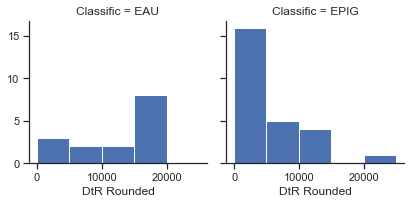

<Figure size 576x288 with 0 Axes>

In [196]:

import seaborn as sns; sns.set(style="ticks", color_codes=True)



x = sns.FacetGrid(new_set, col='Classific')

bins= [0,5000,10000,15000,20000,25000]
x.map(plt.hist, 'DtR Rounded', bins=bins )

plt.show()
plt.tight_layout()

plt.savefig("C:/neruda_viz/eau_epig_diff_DtR Rounded.pdf")

### we're mapping histograms on our grid

In [12]:


x = sns.FacetGrid(new_set, col='Classific')

x.map(plt.hist, 'DtR Rounded', bins=5, )

plt.plot()
plt.figure(figsize = (10,8))

plt.savefig("C:/neruda_viz/eau_epig_diff_DtR Rounded.pdf")

NameError: name 'new_set' is not defined

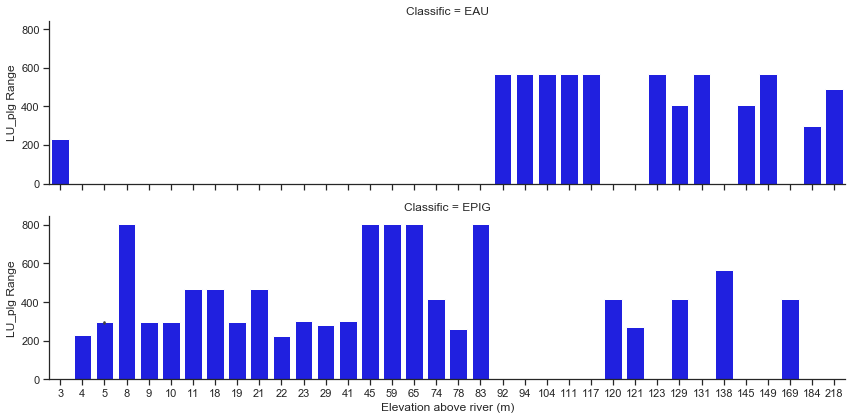

In [199]:
sns.catplot(
    data=new_set,
    x='Elevation above river (m)',
    y='LU_plg Range',
    row='Classific',
    kind='bar',
    height=3, 
    aspect=4,
    color='blue')

In [200]:
%%HTML
<div style="background-color: green; height:100px; width: 100%; display: inline-block; text-align:center;">
<h1>data models & algorithms</h1>
</div>

In [203]:
%%HTML
<div style="background-color: purple; height:100px; width: 100%; display: inline-block; text-align:center;">
    <h1>Feature selection</h1>
</div>

# Univariate selection ... Chi-Squared For Feature Selection
##### viz e.g.  https://chrisalbon.com/machine_learning/feature_selection/chi-squared_for_feature_selection/

#### statistical test can be used to select those features that have strongest relationship with the output variable  (culture)
#### so we can use chi square test from scikit-learn
#### nemusi to byt uplne presne protoze jednotlive promenne muzou korelovat mezi sebou

In [ ]:
new_table_one.columns

In [ ]:
from platform import python_version
print(python_version())

In [ ]:
# pouze vybirame EAU a EPIG cultury
table_one = new_table_one[(new_table_one.Classific == 'EPIG') | (new_table_one.Classific == 'EAU')]
table_one.head()
# we have to change the order of columns
table_one = table_one[['site', 'LU zone', 'LU Min', 'LU Max', 'LU Range',
       'Terrain variability 500 m buffer', 'Terrain variability 1000 m buffer',
       'Viewshed', 'Altitude a.s.l.',
       'Elevation above river (m)', 'Relative hight in LUmin (%)',
       'DtR (m)cor', 'DtR (d2)', 'EAR2+DtR2', 'orientation', 'Classific']]
table_one


table_one.to_csv('C:/my_csv/novy.csv', index = False)

### nezarazuji orientaci ... mohli bychom ji prevezt na dummy variables  X = X.astype(int)
### potrebuji udelat normalizaci, ci standardizaci ?

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Y = table_one.iloc[:,15] # target column
X = table_one.iloc[:,2:14] # independent columns
X.head()

#initialize the model
best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X,Y)

results = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

results_table = pd.concat([dfcolumns, results],axis=1)
results_table.columns = ['Features', 'Score']
results_table.sort_values(by='Score', ascending = False)

results_table.nlargest(7,'Score')

In [ ]:
#initialize the model
best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X,Y)

results = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

### we concated our two tables

#### the higher score the more important feature is

In [ ]:
results_table = pd.concat([dfcolumns, results],axis=1)
results_table.columns = ['Features', 'Score']
results_table.sort_values(by='Score', ascending = False)

In [ ]:
results_table.nlargest(7,'Score')

## FEATURE IMPORTANCE

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# initialize model
model = ExtraTreesClassifier()
model.fit(X,Y)

In [ ]:
model.feature_importances_

In [ ]:
plt.style.use('seaborn')

feature_importance = pd.Series(model.feature_importances_, index = X.columns)
feature_importance.nlargest(7).plot(kind = 'barh')
plt.tight_layout()
plt.show()

## correlation matrix with heatmap ... cultures not included

### jeste by slo pridat i kulturu - to by bylo asi nejlepsi

#### korelovaly mi i jadra s wieshed ..0.5 ...to analyse it we would have to figure out the missing values problem

In [ ]:
plt.style.use('seaborn')

corr_matrix = table_one.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(17,9))
heatmap = sns.heatmap(table_one[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.tight_layout()

fig.savefig("C:/neruda_viz/correlation_matrix.jpg")

In [ ]:
table_one.corr()

# try to conver EAU and EPIG into 0 and 1 
# we're gonna use include cultures in our correlation matrix


In [ ]:
temporary_table = table_one
cultures = []
for i in range(len(temporary_table['Classific'])):
    if temporary_table['Classific'].iloc[i] == 'EAU':
        cultures.append(0)
    elif temporary_table['Classific'].iloc[i] == 'EPIG':
        cultures.append(1)
    else:
        pass
    
for i in range(len(cultures)):
    temporary_table['Classific'].iloc[i] = cultures[i]
temporary_table.head()

### tady je nejaky error ... misto pozitivni je korelace negativni

In [ ]:
plt.style.use('seaborn')

corr_matrix = temporary_table.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(17,9))
heatmap = sns.heatmap(temporary_table[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.tight_layout()

#### dosavadni zjisteni: kultury se odlisuji diky viewshed, vzdalenosti od vodniho toku a vyvysenim nad rekou 
#### ty normalizovane hodnoty mi nic moc nerikaji ... spis tam je jenom outlier

#### pozor na ty outliers to nam uplne rozhazuje trendy

#### co dal: pca, vyzkouset shlukovani
#### vyzkouset treba logistic analysis
##### zkus i klasifikaci ... natrenuj to na znamych datech ... a pak to muzeme pouzit na AMB skupine (cili toto bude testova skupina) a EAU a EPIG budou testovaci skupiny (labeled)
#### nezapomenou na validaci a statisticke testy hypotez pro multivariate data
#### podivat se na effect size --- zpocitat r squared etc
##### dobre by bylo mit treba jeste ke kazde lokalite std nebo mezikvartilove rozpeti
##### relative high in LUmin (%) ... vlastne mi to asi nic moc nerika protoze vlastne micham dve veci presnou pozici lokality a min max pozici celeho LU zone
#### bude dobre vyzkout ruzne modely (dulezite je vzit v potaz jak sum tak )

# split data

### first we should check if our dataset is unbalanced ... our dataset is really small and unbalanced



In [ ]:
table_one_epig = len(table_one.loc[table_one['Classific'] == 'EPIG'])
table_one_eau = len(table_one.loc[table_one['Classific'] == 'EAU'])
print(table_one_epig)
print(table_one_eau)

In [ ]:
# train test split_
from sklearn.model_selection import train_test_split
my_features = ['Terrain variability 1000 m buffer',
       'Viewshed', 'Altitude a.s.l.',
       'Elevation above river (m)', 
       'DtR (m)cor', 'EAR2+DtR2']
predicted_class = ['Classific']

In [ ]:
X = temporary_table[my_features].values
y = temporary_table[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=10)

print(X_train)
print()
print(y_test)

### we're using randomforrestclassifie ... ensemble approach
# Random Forest Classifier

#### e.g. if we're using decision tree we don't need to worry about scale unlike SVM or PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=10)
### method ravel gives me some warning ... trenuji na treningovych datech
model.fit(X_train,y_train.ravel())

### zjistujeme jak je nas model dobry ... pomoci metriky accuracy

In [ ]:
predict_test_data = model.predict(X_test)

from sklearn import metrics

print("accuracy ",metrics.accuracy_score(y_test,predict_test_data))

### precision-recall
## if we have unbalanced dataset it's more useful measure recall and precision then accuracy

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predict_test_data)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
!pip install scikit-learn --upgrade

# metrics: accuracy, recall, precision, f1_score (harmonic mean between recall and precision)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("accuracy score: ",accuracy_score(y_test,predict_test_data))
print("recall score: ",recall_score(y_test,predict_test_data))
print("precision score: ",precision_score(y_test,predict_test_data))
print("f1_score: ",f1_score(y_test,predict_test_data))

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
X = temporary_table[my_features].values
y = temporary_table[predicted_class].values
class_names = temporary_table['Classific']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:

## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
!pip install xgboost

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_predict = classifier.predict(X_test)

In [ ]:
### we would like to use confision matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

### vychazi mi spatne vysledky kvuli unbalanced dataset i guess

In [ ]:
cm = confusion_matrix(y_test,y_predict)
score = accuracy_score(y_test,y_predict)

print(cm)
print(score)

In [ ]:

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## how much time it will takes

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

### we found the best estimator so we can just copy it and paste it below

#### mely by vychazet lepsi vysledky ale nevychazeji protoze mame maly dataset

In [ ]:
random_search.best_estimator_

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

In [ ]:
score

In [ ]:
score.mean()

#### for our test data + confusion matrix

# v PCA nesmim pouzit string etc (davat pozor na datove typy) - with PCA we try to get rid of noisy dimensions
## nezapomenout ze musime standardizovat data (protoze psouzivame jine units)

### uzitecna funkce abecne np.asarray ... to convert data to numpy array

In [ ]:
reshaped_table = new_table_one[["LU Range","Altitude a.s.l.", 'Terrain variability 500 m buffer',"Elevation above river (m)","Relative hight in LUmin (%)","DtR (m)cor", "Viewshed"]]
reshaped_table.head()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# first we have to instantiate our model ... we have to figure out how many principal components we need
pca = PCA(n_components = 2)

In [ ]:
# we're standardizing our input
X = StandardScaler().fit_transform(reshaped_table)
# fit_transform takes care of mechanism PCA
pca_data = pca.fit_transform(X)



In [ ]:

x_axis1 = pca_data[:,0]
y_axis1 = pca_data[:,1]

fig = plt.figure(figsize=(8,6))
# ax derived from axes object (all grapsh)
ax = fig.add_subplot(1,1,1)
ax.scatter(x=x_axis, y=y_axis)


plt.plot();


### udelam PCA pouze pro EAU a EPIG


In [ ]:
temporary_table = new_table_one[(new_table_one['Classific'] == 'EAU') | (new_table_one['Classific'] == 'EPIG')].reset_index(drop=True)
eau_epig_reshaped = temporary_table[["LU Range","Altitude a.s.l.", 'Terrain variability 500 m buffer',"Elevation above river (m)","Relative hight in LUmin (%)","DtR (m)cor", "Viewshed"]]
eau_epig_reshaped.head()

In [ ]:
### how many principal components we should use: min(n_samples,n_features)-1

n_components = min(eau_epig_reshaped.shape[0], eau_epig_reshaped.shape[1]) - 1
n_components

### PCA for eua_epig_reshaped

## tuto standardizaci pouzivam pokud napr. maji features dost odlisne rozptyly (the features in the dataset can contain different ranges of values etc)

# slo by uzit i pipeline function ktera kombinuje odlisne kroky napr. standardizaci a fit daneho modelu ... from sklearn.pipeline import make_pipeline

### we had to rescale it (standardize) because we were dealing with different units in our features (m, % and viewshed)

# How many principal components we should choose in our PCA 
***
<div class="alert alert-danger">
    <p> we can plot it with so called screeplot </p>
    <p> misto PCA bychom mohli i pouzit MDS (multidimensional scaling) ktera se snazi zachovat vzdalonosti z multi-dimenzionalnich dat </p>
    <p> PCA a MDS jsou linearni metody of dimensionality reduction, existuji i non-linear methods e.g. Manifold learning (viz "Swiss roll") </p>
</div>

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# first we have to instantiate our model ... we have to figure out how many principal components we need
pca_1 = PCA(n_components = 6)

In [ ]:
# we're standardizing our input
# vlastne standardizuju na stejne rozptyly ... uzivame pokud napr. ruzne features have complitely different variances
X = StandardScaler().fit_transform(eau_epig_reshaped)
# fit_transform takes care of mechanism PCA
# zde by pak slo napsat pipeline jako pipeline = make_pipeline()
pca_ = pca_1.fit_transform(X)
pca_

### pro potreby scikit-learn ... musime reshape tvar matice

## PCA computes covariance matrix (S) ... S = 1/N*((X^T)*X) ... afterwards we have to compute our eigenvectors (these eigenvectors are our principal components)

In [ ]:
x_axis = pca_data_new[:,0]
y_axis = pca_data_new[:,1]

fig = plt.figure(figsize=(8,6))
# ax derived from axes object (all grapsh)
ax = fig.add_subplot(1,1,1)
ax.scatter(x=x_axis, y=y_axis)


plt.plot();

### vyzkousim shlukovou analyzu, musim nejdriv fit method to train the model but i don't pass the labels

# PCA and K-means

<strong><a href="http://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf">uni berkeley paper </a></strong><br>
<strong><a href="https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca">online diskuse</a></strong><br>

#### podivat se zda muzu pouzit k-means na cely dataset nebo to taky musim pouzit nejdriv na training set a pak na test set a nezapomen na validace

# oprav supervised learning --- we should split dataset dealing with unsupervised learning algorithms
***

<div class="alert alert-danger">
    <strong><p> pozor i u unsupervised learning i should split dataset into training and test one </p><strong><br><br>
    <p> beware of the shape of the vector for Numpy and Pandas compare to scikit learn ... reshape(-1,1) </p>
</div>

### we can tweak our model using another parametrs viz scikit documentation

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# first we have to instantiate our model ... we have to figure out how many principal components we need
# vlastne mi to da minimalne mnozstvi komponent ktere odpovidaji 90% variance z pomodelu
pca = PCA(.90)

In [ ]:
# we're standardizing our input
# vlastne standardizuju na stejne rozptyly ... uzivame pokud napr. ruzne features have complitely different variances
X = StandardScaler().fit_transform(eau_epig_reshaped)
# fit_transform takes care of mechanism PCA
# zde by pak slo napsat pipeline jako pipeline = make_pipeline()
pca_data_new = pca.fit_transform(X)
pca_data_new


In [ ]:
from sklearn.cluster import KMeans
# proc 2 klustry protoze chceme 2 kultury - je to logicke ... stejne jak bychom pro 3 ruzne kytky davali 3 shluky
km1_model = KMeans(n_clusters = 2)

In [ ]:
km1_model.fit(pca_data_new)

### labels pro nase jednotlive lokality

### taky by slo proste uzit: km1_model.labels_

In [ ]:
labels = km1_model.predict(pca_data_new)
len(labels)

### now we can compare result with our cultures

In [ ]:
temporary_table['Classific'].value_counts()

In [ ]:
cultures = []
for i in range(len(temporary_table['Classific'])):
    if temporary_table['Classific'].iloc[i] == 'EAU':
        cultures.append(0)
    elif temporary_table['Classific'].iloc[i] == 'EPIG':
        cultures.append(1)
    else:
        pass
    
print(cultures, end = " ") 


# Evaluating clustering ... how does it correlate?
### how to count specific element in a list without a loop .... list.count(specific element/number)
#### jen pozor na poradi logickych podminek ... 

#### obecne refaktoruj kod 


Warning: Catching Exception hides all errors…even those which are completely unexpected. This is why you should avoid bare except clauses in your Python programs. Instead, you’ll want to refer to specific exception classes you want to catch and handle. You can learn more about why this is a good idea in this tutorial.

### slo by to zobrazit i pomoci Crosstabulation

In [ ]:
df = pd.DataFrame({'labels':labels, 'cultures': temporary_table['Classific']})
df

In [ ]:
# nemohli bychom iterovat na objektu kmeans bez metody labels
success_total, eau_total, epig_total = 0, 0, 0
try:
    for i, j in zip(cultures, labels):
        if i == j:
            success_total += 1
            if i == j & j == 0:
                eau_total += 1
            elif i == j & j == 1:
                epig_total += 1
            else:
                pass
        else:
            pass
# specificky typ vyjimky
except AssertionError as error:
    print(error)
    print("something went wrong")
    
# celkove

print("celkova uspesnost nasi analyzy je {0}% \n".format(((success_total/len(cultures))*100)))
print("celkova uspesnost EAU {0}% \n".format(((eau_total/cultures.count(0))*100)))
print("celkova uspesnost EPIG {0}% \n".format(((epig_total/cultures.count(1))*100)))

## if some results are too good, it's weard it can be overfitted or it can be indicator of "leaky" variable or "leaky" dataset

## how tight are our clusters ? (measure inertia)  ... how far are single points far from the centroid

In [ ]:
print(km1_model.inertia_)

### how many clusters we should use ... inertia-clusters trade-off  ... melo by byt co jak nejmene klastru a co jak nejmensi inersia - najit nejlepsi tradeoff

# co mi rikaji tyto vysledky?

### u EAU pokud nastavim confidence interval na 90 procent tak asi budeme moci zamitnout H0
### spocitej urcite r squared ... asi u EPIG nemerime nejake promenne a sidelni strategie zavisi na necem jeste uplne jinym ... meli bychom separatne zmerit r squared (nebo nejaky jiny effect size)

# plot both clusters

### x and y axes are our principal components ... they don't mean much bacause it's problem think about high-dimensional space just in one plane (2D)

## Put labels overhere

In [ ]:
x_axis = pca_data_new[:,0]
y_axis = pca_data_new[:,1]

fig = plt.figure(figsize=(8,6))
# ax derived from axes object (all grapsh)
ax = fig.add_subplot(1,1,1)
# labels from our model
ax.scatter(x=x_axis, y=y_axis, c = labels)

plt.tight_layout()
plt.plot();

# to show visually reasults of our model we can use CONFUSION MATRIX
### viz https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html or https://www.datacamp.com/community/tutorials/introduction-machine-learning-python

# problem with underfitting and overfitting  (bias-variance trade-off)
***

<div class="alert alert-danger">
    <strong><p> too many components in PCA or too many clusters in K-means can incorporate undesirable noise (it is too wiggly) ... it results in overfitting </p><strong><br><br>
    <p> not enough principal components can result in underfitting </p>
</div>

# Drawbacks of K-means++ :
#### The biggest disadvantage is that K-Means requires you to pre-specify the number of clusters (k). ... but there is no such a problem if we deal with k-means ++
#### Hierarchical clustering is an alternative approach that does not require a particular choice of clusters. An additional disadvantage of k-means is that it is sensitive to outliers and different results can occur if you change the ordering of the data.
##### keep in mind sensitivity to outliers ... many ML algorithms have trouble handeling the  missing values.

### heads  up --- the shape of a matrix (the shape of a matrix is vary from pandas, numpy and scikit-learn)

In [ ]:
x = np.array([[1,2,3],[3,23,4]]) # this shape is typical for pandas and numpy
x

### reshape umoznuji vytvorit jednorozmerne pole

##### obecne pri praci s numpy se vyhybame normalnim iteracim protoze vektorove operace jsou mnohem rychlejsi

In [ ]:
x.reshape(-1,1) # this is needed for scikit-learn

In [ ]:
y = pd.DataFrame([[1,2,3],[3,23,4]])
y

In [ ]:
z = y
z.stack()

In [ ]:
%%HTML
<div style="background-color: yellow; height:50px; width: 100%; display: inline-block; text-align:center;">
<h1>table 2 </h1>
</div>

In [ ]:
last_table = pd.read_excel("C:/new_table.xls")
last_table

In [ ]:
last_table.shape

In [ ]:
new_column = new_table_one['Classific']
last_table['Classific'] = new_column
last_table_completed = last_table.drop(['SITE ID'],axis=1)
last_table_completed

### only epig and eau

In [ ]:
table_one_ = last_table_completed[(last_table_completed.Classific == 'EPIG') | (last_table_completed.Classific == 'EAU')]
table_one_.head()


In [ ]:
temporary_table_x = table_one_
cultures = []
for i in range(len(temporary_table_x['Classific'])):
    if temporary_table_x['Classific'].iloc[i] == 'EAU':
        cultures.append(0)
    elif temporary_table_x['Classific'].iloc[i] == 'EPIG':
        cultures.append(1)
    else:
        pass
    
for i in range(len(cultures)):
    temporary_table_x['Classific'].iloc[i] = cultures[i]
temporary_table_x.head()

### Feature selection - univariate selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y_ = temporary_table_x.iloc[:,12] # target column
X_ = temporary_table_x.iloc[:,:12]


In [ ]:
#initialize the model
best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X_,y_)

results_new = pd.DataFrame(fit.scores_)
dfcolumns_new = pd.DataFrame(X.columns)


In [ ]:
results = pd.concat([dfcolumns_new,results_new,],axis=1)
results.columns = ['Features', 'Score']
results.sort_values(by='Score', ascending = False)


In [ ]:
results.nlargest(7,'Score')

### Feature importance

In [ ]:
# initialize model
model_new = ExtraTreesClassifier()
model_new.fit(X_,y_)

In [ ]:
model_new.feature_importances_

In [ ]:
plt.style.use('seaborn')

feature_importance = pd.Series(model_new.feature_importances_, index = X.columns)
feature_importance.nlargest(7).plot(kind = 'barh')
plt.tight_layout()
plt.show()

### correlation table

In [ ]:
plt.style.use('seaborn')

corr_matrix = temporary_table_x.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(17,9))
heatmap = sns.heatmap(temporary_table_x[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix

In [ ]:
%%HTML
<div style="background-color: blue; height:50px; width: 100%; display: inline-block; text-align:center;">
<h1>final table line</h1>
</div>

In [ ]:
# the oldest one
new_table_one.head()

In [ ]:
# the second one
last_table.head()

In [ ]:
print(" first table ", new_table_one.shape)
print("second table ", last_table.shape)



### final table

In [ ]:
new_table_one.keys()
x_1 = new_table_one[['Terrain variability 500 m buffer','Terrain variability 1000 m buffer','Viewshed']]
x_1

x_2 = last_table[[
       'Elevation above river (m)', 
       'Relative hight in LU_line (%)', 
       'DtR 15022020 zaokrouhleno', 'Classific']]

final_table = pd.concat([x_1,x_2],axis=1)
final_table.head()

### final table eau epig

In [ ]:
final_table_epig_eau = final_table[(final_table.Classific == 'EPIG') | (final_table.Classific == 'EAU')]
final_table_epig_eau.head()

In [ ]:
data_normalized.keys()

In [ ]:
final_table.keys()

In [ ]:
x_1 = final_table[['Terrain variability 500 m buffer', 'Terrain variability 1000 m buffer',
       'Elevation above river (m)', 'DtR 15022020 zaokrouhleno']]

x_2 = data_normalized[[
       'Viewshed',  
       'Normalized height in Lu Min', 'Classific']]

final_table_1 = pd.concat([x_1,x_2],axis=1)
final_table_1.head()

In [ ]:
final = final_table_1[((final_table_1.Classific == 1) | (final_table_1.Classific == 0))]
final.head(10)

### saving csv for R hotelling t squared test

In [ ]:
final_table_epig_eau.to_csv('C:/my_csv/final_table.csv', index = False)

In [ ]:
tab_final = final_table_epig_eau.iloc[:,2:12].reset_index(drop=True)
tab_final

## dummy variables - eau 0, epig 1

In [ ]:
final_cultures = []
for i in range(len(final_table_epig_eau['Classific'])):
    if final_table_epig_eau['Classific'].iloc[i] == 'EAU':
        final_cultures.append(0)
    elif final_table_epig_eau['Classific'].iloc[i] == 'EPIG':
        final_cultures.append(1)
    else:
        pass
    
print(final_cultures, end = " ") 


for i in range(len(final_cultures)):
    tab_final['Classific'].iloc[i] = final_cultures[i]
tab_final.head()

### Check

In [ ]:
final.corr()

In [ ]:
plt.style.use('seaborn')

corr_matrix = tab_final.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(17,9))
heatmap = sns.heatmap(tab_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.tight_layout()

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(tab_final[['Viewshed','Elevation above river (m)','DtR 15022020 zaokrouhleno']], alpha = 0.8, figsize = (20,10))

In [ ]:
tab_final['Relative hight in LU_line (%)'].hist(bins=20)

In [ ]:
%%HTML
<div style="background-color: blue; height:50px; width: 100%; display: inline-block; text-align:center;">
<h1>final table plg</h1>
</div>

In [ ]:
new_table_one.keys()
p1 = new_table_one[['site','LU zone','Terrain variability 500 m buffer','Terrain variability 1000 m buffer','Viewshed']]


p2 = last_table_completed[['LU_plg Min', 'LU_plg Max', 'LU_plg Range',
       'Elevation above river (m)', 
       'Relative hight in LU_plg (%)', 
       'DtR 15022020 zaokrouhleno', 'Classific']]

final_table_2 = pd.concat([p1,p2],axis=1)
final_table_2
fig.savefig("C:/neruda_viz/tab.pdf")
final_table_2.to_excel(r'C:/neruda_viz/tab.xlsx')

In [ ]:
final_table_2_epig_eau = final_table_2[(final_table_2.Classific == 'EPIG') | (final_table_2.Classific == 'EAU')].reset_index(drop=True)
final_table_2_epig_eau

final_table_2_epig_eau.to_excel(r'C:/neruda_viz/tab_2_epig_eau.xlsx')


In [ ]:
tab_final_2 = final_table_2_epig_eau.iloc[:,2:12].reset_index(drop=True)
tab_final_2

tab_final_2.to_csv(r'C:/neruda_viz/table.csv')

In [ ]:
tab_final_2['Viewshed']

# Plot viewshed, dtr, elevation -> standardizing + plot

In [ ]:
from sklearn import preprocessing
X_viewshed = tab_final_2['Viewshed']
X_dtr = tab_final_2['DtR 15022020 zaokrouhleno']
X_elevation = tab_final_2['Elevation above river (m)']
X_viewshed = preprocessing.Normalizer().fit(X_viewshed, norm='l2')
X_dtr = preprocessing.Normalizer().fit(X_dtr, norm='l2')
X_elevation = preprocessing.Normalizer().fit(X_elevation, norm='l2')


tmp_var = tab_final_2
for i in range(len(tmp_var['Classific'])):
    tmp_var['Viewshed'].iloc[i] = X_viewshed[i]

for i in range(len(tmp_var['Classific'])):
    tmp_var['DtR 15022020 zaokrouhleno'].iloc[i] = X_dtr[i]
    
for i in range(len(tmp_var['Classific'])):
    tmp_var['Elevation above river (m)'].iloc[i] = X_elevation[i]
    
tmp_var

In [ ]:
features = tmp_var
Labels = ['EAU','EPIG']
colors =['r','g']
classlblb = tmp_var['Classific']
# we are creating the whole class figure for all kind of objects included in our projects
fig = plt.figure(figsize=(14,10))
# ax derived from axes object (all grapsh)
ax = fig.add_subplot(1,1,1)
# convert data to array numpy
colors = np.asarray(colors)            
colorslist = colors[classlblb]
Labels = np.asarray(Labels)
labellist = Labels[classlblb]
# scater plot parameter s - velikost bublin v scatter plot
for x,y,s,c,l in zip(tmp_var['Viewshed'],tmp_var['DtR 15022020 zaokrouhleno'],tmp_var['Elevation above river (m)'],colorslist,labellist):
    ax.scatter(x,y, s=100*s,color=c,label=l,cmap='viridis',alpha = 0.8)

handles, labels = ax.get_legend_handles_labels()

newLeg=dict()

for h,l in zip(handles,labels):
    if l not in newLeg.keys():
        newLeg[l]=h
        
#create new handles and labels
handles=[]
labels=[]

for l in newLeg.keys():
    handles.append(newLeg[l])
    labels.append(l)

#create new Legend
ax.legend(handles,Labels,loc ='lower right',frameon=True,prop={'size':15})
ax.set_xlabel("Viewshed",fontsize="14")
ax.set_ylabel('Elevation above river (m)',fontsize="12")
#ax.set_zlabel(iris.feature_names[2],fontsize="22")
ax.set_title("DtR 15022020 zaokrouhleno",fontsize = '12')
plt.show()

## dummy variables - eau 0, epig 1

In [ ]:
final_cultures_1 = []
for i in range(len(final_table_2_epig_eau['Classific'])):
    if final_table_2_epig_eau['Classific'].iloc[i] == 'EAU':
        final_cultures_1.append(0)
    elif final_table_2_epig_eau['Classific'].iloc[i] == 'EPIG':
        final_cultures_1.append(1)
    else:
        pass
    
print(final_cultures_1, end = " ") 


for i in range(len(final_cultures_1)):
    tab_final_2['Classific'].iloc[i] = final_cultures_1[i]
tab_final_2.head()

# last check

In [ ]:
tab_final_2['Relative hight in LU_plg (%)'].hist()

In [ ]:
tab_final_2.corr()

In [ ]:
plt.style.use('seaborn')

corr_matrix = tab_final_2.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(17,9))
heatmap = sns.heatmap(tab_final_2[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.tight_layout()

In [ ]:
tab_final_2.iloc[:,0:9]

In [ ]:
tab_final_2.to_csv('C:/my_csv/final_table_2.csv', index = False)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# first we have to instantiate our model ... we have to figure out how many principal components we need
# vlastne mi to da minimalne mnozstvi komponent ktere odpovidaji 90% variance z pomodelu
pca = PCA(.90)

In [ ]:
final = tab_final_2.iloc[:,0:9]
# we're standardizing our input
# vlastne standardizuju na stejne rozptyly ... uzivame pokud napr. ruzne features have complitely different variances
X = StandardScaler().fit_transform(final)
# fit_transform takes care of mechanism PCA
# zde by pak slo napsat pipeline jako pipeline = make_pipeline()
pca_data_new = pca.fit_transform(X)
pca_data_new

In [ ]:
from sklearn.cluster import KMeans
# proc 2 klustry protoze chceme 2 kultury - je to logicke ... stejne jak bychom pro 3 ruzne kytky davali 3 shluky
km1_model = KMeans(n_clusters = 2)

In [ ]:
km1_model.fit(pca_data_new)

In [ ]:
labels = km1_model.predict(pca_data_new)
len(labels)

In [ ]:
cultures_x = []
for i in tab_final_2.iloc[:,9]:
    cultures_x.append(i)
len(cultures_x)

In [ ]:
# nemohli bychom iterovat na objektu kmeans bez metody labels
success_total, eau_total, epig_total = 0, 0, 0
try:
    for i, j in zip(cultures_x, labels):
        if i == j:
            success_total += 1
            if i == j & j == 0:
                eau_total += 1
            elif i == j & j == 1:
                epig_total += 1
            else:
                pass
        else:
            pass
# specificky typ vyjimky
except AssertionError as error:
    print(error)
    print("something went wrong")
    
# celkove

print("celkova uspesnost nasi analyzy je {0}% \n".format(((success_total/len(cultures_x))*100)))
print("celkova uspesnost EAU {0}% \n".format(((eau_total/cultures_x.count(0))*100)))
print("celkova uspesnost EPIG {0}% \n".format(((epig_total/cultures_x.count(1))*100)))

In [ ]:
print(km1_model.inertia_)

In [ ]:
x_axis = pca_data_new[:,0]
y_axis = pca_data_new[:,1]

fig = plt.figure(figsize=(8,6))
# ax derived from axes object (all grapsh)
ax = fig.add_subplot(1,1,1)
# labels from our model
ax.scatter(x=x_axis, y=y_axis, c = labels)

plt.tight_layout()
plt.plot();

# Random forest

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
final.keys()

In [ ]:
my_features = ['Terrain variability 500 m buffer', 'Terrain variability 1000 m buffer',
       'Elevation above river (m)', 'DtR 15022020 zaokrouhleno', 'Viewshed',
       'Normalized height in Lu Min',]
predicted_class = ['Classific']

In [ ]:
X = final[my_features].values
y = final[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=10)
### method ravel gives me some warning ... trenuji na treningovych datech
model.fit(X_train,y_train.ravel())

In [ ]:
predict_test_data = model.predict(X_test)

from sklearn import metrics

print("accuracy ",metrics.accuracy_score(y_test,predict_test_data))

# unbalanced dataset ... it's better measure precision and recall

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predict_test_data)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:

## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

# SVM

### normalized confusion matrix good if the dataset is unbalanced

### regulation parameter C can be picked by Grid search

In [ ]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
X = final[my_features].values
y = final[predicted_class].values
class_names = final['Classific']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='rgp', C=0.10).fit(X_train, y_train.ravel())

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test,y_predict)
score = accuracy_score(y_test,y_predict)

print(cm)
print(score)

In [ ]:
classifier.fit(X_train,y_train.ravel())

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
y_predict = classifier.predict(X_test)